In [128]:
%load_ext autoreload
import datetime
# import ete3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import xml.etree.ElementTree as ET
import xml.dom.minidom
# import xmlschema

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.print_xes_info import PrintXesInfo
import maxes.analyze_sequence
import maxes.serialization.serialize
# import maxes.graphs
# import maxes.utils
from maxes.generators.xes_generator1 import XesGenerator1

In [ ]:
import logging
import importlib

def setup_logging():
    # TODO: use __vsc_ipynb_file__
    importlib.reload(logging)
    filename_timestamp_part = datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
    filename = f"/vt/md/maxes/maxes/output/logs/notebooks/{filename_timestamp_part}.log"
    logging.basicConfig(
        filename=filename,
        filemode="a",
        format="%(asctime)s %(message)s",
        level=logging.DEBUG)
    logging.info("START")

setup_logging()

In [ ]:
# source_file_path = "/vt/md/maxes/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes"
source_file_path = "/vt/md/maxes/maxes/maxes/data/Conformance Checking Challenge 2019 (CCC19)_1_all/data/CCC19 - Log XES.xes"
loader = XesLoader({ "drop_timezones": True })

logging.info("Loading")
log = loader.load(source_file_path)

if len(loader.errors):
    raise RuntimeError("Errors while loading XES")

# logging.info("Creating dataframes")
# for trace in log.traces:
#     trace.update_df()

logging.info("Fitting")
generator = XesGenerator1(debug=True).fit(log)

ROUND
RESOURCE
VIDEOSTART
VIDEOEND


In [125]:
# for feature, attributes in generator._event_feature_dependency_graph.nodes.items():
#     print(feature)
#     print(attributes)
#     print()

# generator.numerical_attributes

# generator.categorical_attributes

# log.event_attribute_type_map

# [attribute
#     for attribute, attr_type in log.event_attribute_type_map.items()
#     if attr_type in ["date", "int", "float"] and
#     attribute not in ["concept:name", "lifecycle:transition", "time:timestamp"]]

# [attribute
#     for attribute, attr_type in log.event_attribute_type_map.items()
#     if attr_type in ["string", "id", "bool"] and
#     attribute not in ["concept:name", "lifecycle:transition", "time:timestamp"]]

graph = generator._event_feature_dependency_graph

graph.out_degree()

OutDegreeView({'ROUND': 0, 'RESOURCE': 0, 'VIDEOSTART': 0, 'VIDEOEND': 0, 'ACTIVITY': 3, 'org:resource': 4, 'STAGE': 3, 'time:timestamp': 4, 'EVENTID': 3})

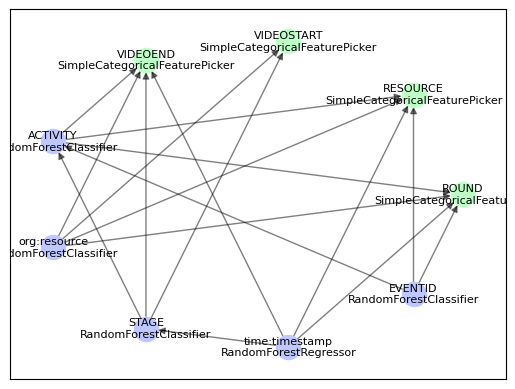

In [126]:
def draw_event_feature_dependency_graph(graph):
    fig, ax = plt.subplots()
    # pos = nx.shell_layout(graph)
    pos = nx.circular_layout(graph)

    # nx.draw_networkx(graph, pos, ax=ax)

    # Nodes
    nodelist_independent_features = [feature
                                     for feature, out_degree in graph.out_degree()
                                     if out_degree == 0]
    nx.draw_networkx_nodes(graph, pos, ax=ax, nodelist=nodelist_independent_features, node_shape="o", node_color="#BEFFC7")

    nodelist_dependent_features = [feature
                                     for feature, out_degree in graph.out_degree()
                                     if out_degree != 0]
    nx.draw_networkx_nodes(graph, pos, ax=ax, nodelist=nodelist_dependent_features, node_shape="o", node_color="#BEC7FF")

    # Edges
    nx.draw_networkx_edges(graph, pos, ax=ax, alpha=0.5)

    # Node labels
    node_labels = {node: f"{node}\n{data["model"].__class__.__name__}"
                   for node, data in graph.nodes.items()}
    nx.draw_networkx_labels(graph, pos, ax=ax, labels=node_labels, font_size=8)

draw_event_feature_dependency_graph(generator._event_feature_dependency_graph)


In [67]:
g = nx.DiGraph()
g.add_node('a', w=1)
g.add_node('b', w=2)
g.add_node('c', w=3)
# g.add_node('a')
g.nodes
# np.random.choice(g.nodes, size=2, replace=False)
next(iter(g.nodes))

'a'

In [134]:
from sklearn.neighbors import KernelDensity
model = KernelDensity()
X = pd.DataFrame([
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 2 },
    { "attr": 2 },
    { "attr": 3 },
])
print(X[["attr"]])
# model.fit(X[["attr"]])
# model.sample()

   attr
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     3


In [1]:
# attributes = ["a", "b", "c"]
# meta = ["time_delta", "event_index", "trace_index", "other"]
X = pd.DataFrame([
    { "attr": 1 },
    { "attr": 9 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 1 },
    { "attr": 2 },
    { "attr": 2 },
    { "attr": 3 },
])

X["attr"] - X.shift(1)["attr"]

NameError: name 'pd' is not defined